In [1]:
from modules.data import data_reader
import pandas as pd
import numpy as np
import os

In [16]:
evaluation = data_reader.read_data(match=["return"], location="evaluation")
prediction = data_reader.read_data(match=["return"], location="prediction")

# Data aggregation

In [3]:
# path to evaluation directory
project_folder = os.getcwd()
directory = os.path.abspath(os.path.join(project_folder, "results", "evaluation"))

In [4]:
# Initialize an empty DataFrame to store the aggregated results
aggregated_evaluation = pd.DataFrame()

In [5]:
# List all files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.csv')]

In [6]:
# Process each file
for file in files:
    # Extract parameters from the file name
    base_name = os.path.splitext(file)[0]
    parameters = base_name.split('__')
    param_dict = {}
    for param in parameters:
        key, value = param.split('=')
        param_dict[key] = value

    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)

    # Add parameter columns to the DataFrame
    for key, value in param_dict.items():
        df[key] = value

    # Append the DataFrame to the aggregated DataFrame
    aggregated_evaluation = pd.concat([aggregated_evaluation, df], ignore_index=True)

In [7]:
param_columns = list(param_dict.keys())
csv_columns = list(df.columns)
all_columns = param_columns + [col for col in csv_columns if col not in param_columns]
aggregated_evaluation = aggregated_evaluation[all_columns]

In [8]:
aggregated_evaluation.rename(columns={"Unnamed: 0" : "model"}, inplace=True)

# Prediction visualization

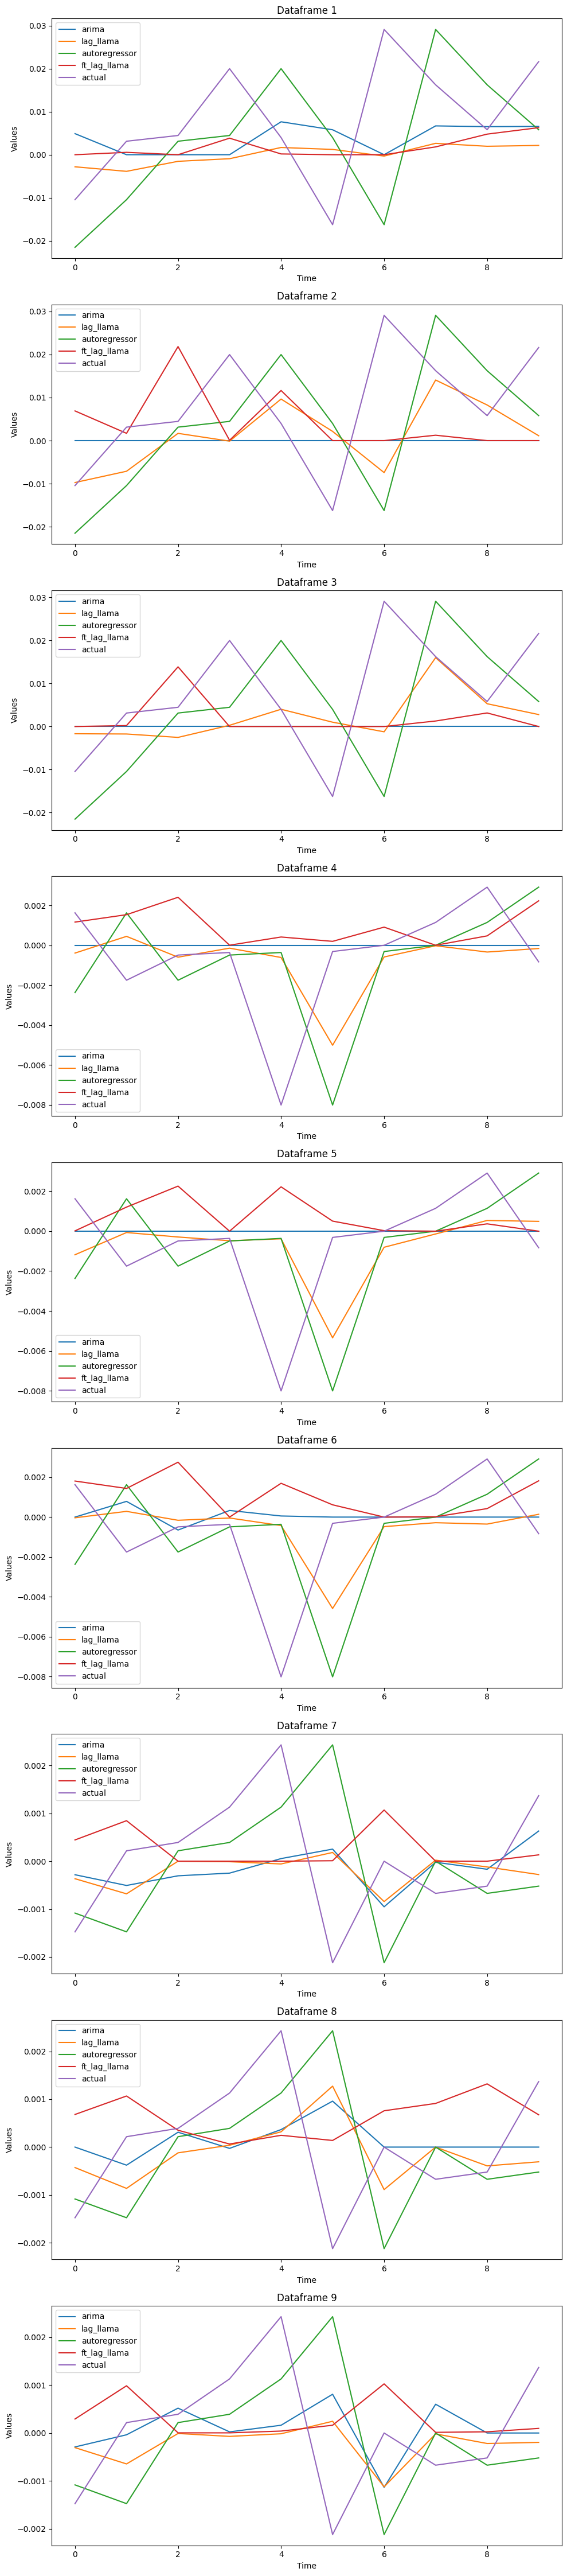

In [17]:
import matplotlib.pyplot as plt

# Assuming `prediction` is your list of dataframes
def plot_dataframes(prediction):
    num_plots = len(prediction)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    # Check if there's only one dataframe to handle the axes object properly
    if num_plots == 1:
        axes = [axes]

    for i, df in enumerate(prediction):
        ax = axes[i]
        df.plot(ax=ax)
        ax.set_title(f'Dataframe {i+1}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Values')

    plt.tight_layout()
    plt.show()

# Example usage with your `prediction` list
plot_dataframes(prediction)